<a href="https://colab.research.google.com/github/chaitragopalappa/MIE590-690D/blob/main/7_NN_for_sequences_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NN for sequence data: Recurrent Neural Networks (RNN)**
**Sources**
* Chapter 15.1 and 15.2, Probabilistic Machine Learning: An Introduction by Kevin Murphy  
* [Chapters 4 and 5, Hands-On-Deep-Learning-Algorithms-with-Python, by Sudharsan Ravichandiran](https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/tree/master)
* [Chapter 13, Deep learning with Python, by Francios Chollet and Matthew Watson](https://deeplearningwithpython.io/chapters/chapter13_timeseries-forecasting/#recurrent-neural-networks)
* [Chapters 9 and 10, Dive into Deep Learning, by Zhang et. al.](https://d2l.ai/chapter_recurrent-modern/machine-translation-and-dataset.html)
  
Excerpts directly copied from sources are italized. I use AI Chatbots to generate codes.

# Recurrent neural network (RNN)
*RNN is a neural network which maps from an input space of
sequences to an output space of sequences in a stateful way. That is, the prediction of output $y_t$
depends not only on the input $x_t$, but also on the hidden state of the system, $h_t$, which gets updated
over time, as the sequence is processed. Such models can be used for sequence generation, sequence
classification, and sequence translation.* Broadly, RNNs can be used on text data (natural language processing), numerical data (time-series data), and image data (captioning with CNN). We will focus on mainly numerical data. Though the data handling changes for text and image data the methods are generally transferable.

General architectures of RNN:
* Sequence generation (**VecToSeq**): natural language generation; image captioning when stacked on CNN;
* Sequence classification or prediction (**SeqToVec**):
  * text classification: sentiment analysis;
  * times-series forecasting: [streaming lab results, vitals, and medications to predict sepsis](https://proceedings.mlr.press/v68/futoma17a/futoma17a.pdf); stock pricing; electricity consumption forecasting; [epidemic forecasting](https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-023-16720-6);
  * surrogate models of non-linear dynamic systems: [computational fluid dynamics](https://arxiv.org/html/2403.14283v1)
* Sequence translation (**SeqToSeq**):
  * time-series 'n'-step forceasting: [travel ridership in chicago transit](https://github.com/ageron/handson-ml3/blob/main/15_processing_sequences_using_rnns_and_cnns.ipynb)
  * encoder-decoder mechanism:  machine translation /language translation; anomaly detection in time-series data; We will get back to this in a later chapter.


---
---
---

# **General architectures using simple (Vanilla) RNN**

### **Vec2Seq: Sequence generation**

The goal is mathematically expressed as a conditional generative model:

$$
p(y_{1:T} | x) = \sum_{h_{1:T}} p(y_{1:T}, h_{1:T} | x) = \sum_{h_{1:T}} \prod_{t=1}^T p(y_t | h_t) p(h_t | h_{t-1}, y_{t-1}, x)
$$

where,
* $T$ be the length of the output (but this is chosen dynamically instead of fixing as an input)
* $h_t$ is the hidden state, with $p(h_1 | h_0, y_0, x) = p(h_1 | x)$ as the initial hidden state distribution (often deterministic).
<img src="https://github.com/probml/pml-book/blob/main/book1-figures/Figure_15.1.png?raw=true" width="200" height="200">

*Figure 15.1: Simple Vec2Seq (enbedded from textbook GitHub repo PML: An Introduction, by Kevin Murphy)*

The forward pass of network can be expressed as:
* $h_t = \phi(W_{yh} y_{t-1} + W_{hh} h_{t-1} + b_h)$
* $y_t = \text{softmax}(W_{hy} h_t + b_y) $ for categorical or $y_t = W_{hy} h_t + b_y $ for real

where,
* $h_t$ is the hidden state;
* $y_0 =x$
* $\phi(.)$ is the activation function,
* $W_{hy}$ are the hidden-to-output weights,
* $W_{hh}$ are the hidden-to-hidden weights,
* $W_{yh}$ are the input-to-hidden weights, and
* $b_h$ and $b_y$ are the bias terms.



---
---

## **Seq2Vec:**
**Simple RNN**

Architecture: Forward pass
* $h_t=\phi(W_{xh}x_t +W_{hh}h_{t-1}+b_h)$
* $y = \mathrm{softmax}(W_h \, h)$ or $y = W_h \, h$

<img src="https://github.com/probml/pml-book/blob/main/book1-figures/Figure_15.4_A.png?raw=true" width="200" height="100">

Figure 15.4a: Simple RNN for sequence classification (enbedded from textbook GitHub repo PML: An Introduction, by Kevin Murphy)

---

**Bidirectional RNN**

Architecture: Forward pass
$$
\overrightarrow{h}_t = \phi(W_{xh}^{\rightarrow} x_t + W_{hh}^{\rightarrow} \overrightarrow{h}_{t-1} + \mathbf{b}_h^{\rightarrow})
$$

$$
\overleftarrow{h}_t = \phi(W_{xh}^{\leftarrow} x_t + W_{hh}^{\leftarrow} \overleftarrow{h}_{t+1} + \mathbf{b}_h^{\leftarrow})
$$

$h_t = [\overrightarrow{h}_t, \overleftarrow{h}_t]$ is the representation of the state at time $t$, taking into account past and future information.

Then average pool over these hidden states to get the final classifier:


$$
h = \frac{1}{T} \sum_{t=1}^T h_t
$$
$$y = \mathrm{softmax}(W_h \, h)$$

<img src="https://github.com/probml/pml-book/blob/main/book1-figures/Figure_15.4_B.png?raw=true" width="200" height="200">

Figure 15.4b: Bidirectional RNN for Seq2Vec (enbedded from textbook GitHub repo PML: An Introduction, by Kevin Murphy)

---
---


## **Seq2Seq: sequence translation (aligned case)**
IN the aligned case we predict one label per location. Example: Human Activity Recognition- labeling sequences of data from wearable sensors to identify human activities at each specific time point.(In the unaligned cas - the sequence is not temporal, e.g., machine translation. We use a encoder-decoder mechanism, which we will disucss later). The  n-step time-series forecasting is still an aligned case, though the output sequence need not be same an input sequence, there is temporal sequence that is relevant.

**Simple RNN**

Architecture: Forward pass
* $h_t=\phi(W_{xh}x_t +W_{hh}h_{t-1}+b_h)$
* $y_t = \mathrm{softmax}(W_{hy}h_t)$ or $y_t = W_{hy} h_t$

<img src="https://github.com/probml/pml-book/blob/main/book1-figures/Figure_15.5_A.png?raw=true" width="200" height="100">

Figure 15.5a: Simple RNN for sequence classification (enbedded from textbook GitHub repo PML: An Introduction, by Kevin Murphy)

---

**Bidirectional RNN**

Architecture: Forward pass
$$
\overrightarrow{h}_t = \phi(W_{xh}^{\rightarrow} x_t + W_{hh}^{\rightarrow} \overrightarrow{h}_{t-1} + \mathbf{b}_h^{\rightarrow})
$$

$$
\overleftarrow{h}_t = \phi(W_{xh}^{\leftarrow} x_t + W_{hh}^{\leftarrow} \overleftarrow{h}_{t+1} + \mathbf{b}_h^{\leftarrow})
$$

$h_t = [\overrightarrow{h}_t, \overleftarrow{h}_t]$ is the representation of the state at time $t$, taking into account past and future information.

$$y_t = W_{hy} h_t + b_y$$

<img src="https://github.com/probml/pml-book/blob/main/book1-figures/Figure_15.5_B.png?raw=true" width="200" height="200">

*Figure 15.5b: Bidirectional RNN for Seq2Seq (enbedded from textbook GitHub repo PML: An Introduction, by Kevin Murphy)*

---

**Deep RNN: Stack multiple chains**

The hidden units for layer $l$ at time $t$ are computed using

$$
h_t^l = \phi^l \left(W_{xh}^l h_t^{l-1} + W_{hh}^l h_{t-1}^l + b_h^l \right)
$$

The output is given by

$$
o_t = W_{ho} h_t^L + b_o
$$

<img src="https://github.com/probml/pml-book/blob/main/book1-figures/Figure_15.6.png?raw=true" width="400" height="200">

*Figure 15.6: Deep RNN for Seq2Seq (enbedded from textbook GitHub repo PML: An Introduction, by Kevin Murphy)*

---
---
---



# **Model Training: Back propogation through time (BPTT)**

Suppose the model is of the following form (it is set to a simplistic model: bias terms are removed and the activation function is set to identity mapping):

$$
h_t = \phi(W_{xh} x_t + W_{hh} h_{t-1})= W_{xh} x_t + W_{hh} h_{t-1}
$$

$$
o_t = W_{ho} h_t
$$

where $o_t$ are the output logits.

Suppose $y_t$ are the true target labels for each time step, we define loss

$$
L = \frac{1}{T} \sum_{t=1}^T \ell(y_t, o_t)
$$

We need to compute the derivatives $\frac{\partial L}{\partial W_{hx}}$, $\frac{\partial L}{\partial W_{hh}}$, and $\frac{\partial L}{\partial W_{ho}}$. The latter term is easy since it is local to each time step. However, the first two terms depend on the hidden state, and thus require working backwards in time. (We unroll the computation graph, as shown in the figure, and then apply the backpropagation algorithm- thus the name BPTT).

Simplified notations:

$$
h_t = f(x_t, h_{t-1}, w_h)
$$

$$
o_t = g(h_t, w_o)
$$

where $w_h$ is the flattened version of $W_{hh}$ and $W_{xh}$ stacked together.

Computing $\frac{\partial L}{\partial w_h}$:

By the chain rule, we have

$$
\frac{\partial L}{\partial w_h} = \frac{1}{T} \sum_{t=1}^T \frac{\partial \ell(y_t, o_t)}{\partial w_h} = \frac{1}{T} \sum_{t=1}^T \frac{\partial \ell(y_t, o_t)}{\partial o_t} \frac{\partial g(h_t, w_o)}{\partial h_t} \frac{\partial h_t}{\partial w_h}
$$

We can expand the last term as follows:

$$
\frac{\partial h_t}{\partial w_h} = \frac{\partial f(x_t, h_{t-1}, w_h)}{\partial w_h} + \frac{\partial f(x_t, h_{t-1}, w_h)}{\partial h_{t-1}} \frac{\partial h_{t-1}}{\partial w_h}
$$

If we expand this recursively, we find the following result:

$$
\frac{\partial h_t}{\partial w_h} = \frac{\partial f(x_t, h_{t-1}, w_h)}{\partial w_h} + \sum_{i=1}^{t-1} \left( \prod_{j=i+1}^{t} \frac{\partial f(x_j, h_{j-1}, w_h)}{\partial h_{j-1}} \right) \frac{\partial f(x_i, h_{i-1}, w_h)}{\partial w_h}
$$

*Unfortunately, this takes $O(T)$ time to compute per time step, for a total of $O(T^2)$ overall. It is therefore standard to truncate the sum to the most recent $K$ terms. It is possible to adaptively pick a suitable truncation parameter $K$ ; however, it is usually set equal to the length of the subsequence in the current minibatch.*

*When using truncated BPTT, we can train the model with batches of short sequences, usually created by extracting non-overlapping subsequences (windows) from the original sequence. If the previous subsequence ends at time $t - 1$, and the current subsequence starts at time $t$, we can “carry over” the hidden state of the RNN across batch updates during training. However, if the subsequences are not ordered, we need to reset the hidden state.*


<img src="https://github.com/probml/pml-book/blob/main/book1-figures/Figure_15.9.png?raw=true" width="400" height="400">

*Figure 15.9: An RNN unrolled (vertically) for 3 time steps, with the target output sequence and loss node*
shown explicitly(embedded from textbook GitHub repo PML: An Introduction, by Kevin Murphy)

---
---

**Vanishing and exploding gradients**
*The activations in an RNN can decay or explode as we go forwards in time, since we multiply by the weight matrix $W_{hh}$ at each time step. Similarly, the gradients in an RNN can decay or explode as we go backwards in time, since we multiply the Jacobians at each time step*. Exploding gradient can be controlled by gradient clipping. Vanilla RNN suffers from vanishing gradient problem. Therefore, though RNNs with enough hidden units can in principle remember inputs from long in the past, in practical appplication it typically does not because of the vanishing gradient problem.

### **GRU** and **LSTM** update the **hidden state** in an additive way to overcome these issues.

---
---
---

## **Gated Reccurrent Unit (GRU)**
The key idea is to learn when to update the hidden state, by using a gating unit. This
can be used to selectively “remember” important pieces of information when they are first seen. The
model can also learn when to reset the hidden state, and thus forget things that are no longer useful.

<img src="https://github.com/probml/pml-book/blob/main/book1-figures/Figure_15.10.png?raw=true" width="500" height="400">

*Figure 15.10: Gated Recurrent Unit (embedded from textbook GitHub repo PML: An Introduction, by Kevin Murphy)*

$$
\mathbf{R}_t = \sigma(\mathbf{X}_t \mathbf{W}_{xr} + \mathbf{H}_{t-1} \mathbf{W}_{hr} + \mathbf{b}_r)
$$
$$
\mathbf{Z}_t = \sigma(\mathbf{X}_t \mathbf{W}_{xz} + \mathbf{H}_{t-1} \mathbf{W}_{hz} + \mathbf{b}_z)
$$
$$
\widetilde{\mathbf{H}}_t = \tanh(\mathbf{X}_t \mathbf{W}_{xh} + (\mathbf{R}_t \odot \mathbf{H}_{t-1}) \mathbf{W}_{hh} + \mathbf{b}_h)
$$
$$
\mathbf{H}_t = \mathbf{Z}_t \odot \mathbf{H}_{t-1} + (1 - \mathbf{Z}_t) \odot \widetilde{\mathbf{H}}_t
$$
Where
* $\mathbf{X}_t$ be a $N \times D$ matrix, where $N$ is the batch size, and $D$ is the sequence size,
* $\mathbf{H}_t$ is a $N \times H$ matrix, where $H$ is the number of hidden units at time $t$,
* $\mathbf{R}_t \in \mathbb{R}^{N \times H}$ the reset gate,   
* $\mathbf{Z}_t \in \mathbb{R}^{N \times H}$ the update gate,
* $\sigma(.)$ is the sigmoid function, and this each element of $\mathbf{R}_t$ and $\mathbf{Z}_t$ is in $[0, 1]$
* $\widetilde{\mathbf{H}}_t$) is “candidate” next state
* $\mathbf{H}_t$ is the "actual" next state

Note:
- The “candidate” next state is a linear combination of the old memories that are not reset (computed using $\mathbf{R}_t \odot \mathbf{H}_{t-1}$) and the new inputs $\mathbf{X}_t$, passed through a tanh function to ensure the hidden units remain in the interval $(-1, 1)$.
- The **reset gate can capture new, short-term information**:
  - If the entries of the reset gate $\mathbf{R}_t$ are close to 1, we recover the standard RNN update rule.
  - If the entries are close to 0, the model acts more like an MLP applied to $\mathbf{X}_t$.
- The actual new state is computed by using the dimensions from the candidate state $\widetilde{\mathbf{H}}_t$ chosen by the update gate, $1 - \mathbf{Z}_t$, and keeping the remaining dimensions at their old values of $\mathbf{H}_{t-1}$
- The **update gate can capture long-term dependencies**:
  - When $\mathbf{Z}_{t,d} = 1$, we pass $\mathbf{H}_{t-1,d}$ through unchanged, and ignore $\mathbf{X}_t$.  




## **Long Short Term Memory (LSTM)**
LSTM is a more sophisticated version of the GRU (and pre-dates it by almost 20 years). Addiitonal resource: https://colah.github.io/posts/2015-08-Understanding-LSTMs.

The basic idea is to augment the hidden state $h_t$ with a memory cell $c_t$, controlled through three gates.
<img src="https://github.com/probml/pml-book/blob/main/book1-figures/Figure_15.11.png?raw=true" width="500" height="400">

*Figure 15.11: Long Short Term Memory (LSTM) (embedded from textbook GitHub repo PML: An Introduction, by Kevin Murphy)*


$$
O_t = \sigma(X_t W_{xo} + H_{t-1} W_{ho} + b_o)
$$

$$
I_t = \sigma(X_t W_{xi} + H_{t-1} W_{hi} + b_i)
$$

$$
F_t = \sigma(X_t W_{xf} + H_{t-1} W_{hf} + b_f)
$$

$$
\widetilde{C}_t = \tanh(X_t W_{xc} + H_{t-1} W_{hc} + b_c)
$$

$$
C_t = F_t \odot C_{t-1} + I_t \odot \widetilde{C}_t
$$

$$
H_t = O_t \odot \tanh(C_t)
$$

- $O_t$ is the output gate; it determines what gets read out;
- $I_t$ is the input gate; it determines what new information gets read in to the memory cell; and
- $F_t$ is the forget gate; it determines when we should reset the memory cell.
- $\widetilde{C}_t$ is the candidate cell state:
- $C_t $ is the actual cell state: it is either the candidate cell (if the input gate is on) or the old cell (if the forget gate is on):
  - If $F_t = 1$ and $I_t = 0$, this can remember long term memories.
- $H_t$ is the hidden state; it is a transformed version of the cell, provided the output gate is on
  - Note: $H_t$ is used as the output of the unit as well as the hidden state for the next time step.
- $H_t$ lets the model remember what it has just output (short-term memory), whereas the cell $C_t$ acts as a long-term memory.

---
LSTM variants
- Add peephole connections: pass the cell state as an additional input to the gates.
- A couple of studies used genetic algorithms to test over 10,000 different architectures. Some of these worked better than LSTMs or GRUs, but in general, LSTMs seemed to do consistently well across most tasks.
  - R. Jozefowicz, W. Zaremba, and I. Sutskever. “An Empirical Exploration of Recurrent Network Architectures”. In: ICML. 2015, pp. 2342–2350.
  -  K. Greff, R. K. Srivastava, J. Koutník, B. R. Steunebrink, and J. Schmidhuber. “LSTM: A
Search Space Odyssey”. In: IEEE Transactions on Neural Networks and Learning Systems 28.10 (2017)
-  An RNN controller was used to generate strings which specify RNN architectures, and then trained the controller using reinforcement learning. This outperformed LSTM. However, it is rather complex and has not been adopted by the community.

---
---


## MLP v 1dCNN v RNN




# Simple RNN example to demonstrate data preparation for RNN for time-series forecasting

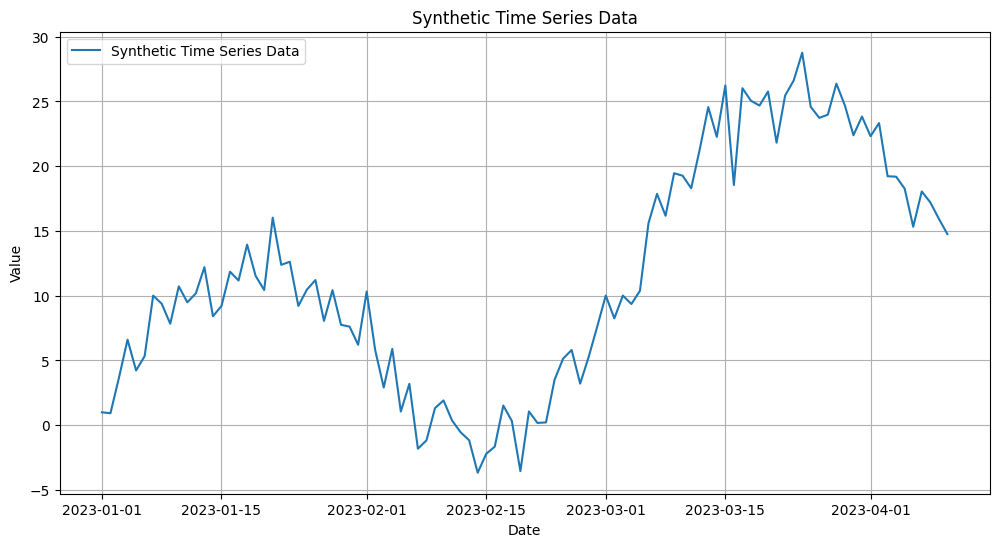

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np

# --- 1. Generate Sample Time Series Data ---
# For demonstration, we'll create a synthetic time series with seasonality and trend
np.random.seed(42)
time = np.arange(0, 100, 1)
amplitude = 10 * np.sin(time / 10) + np.random.randn(len(time)) * 2
trend = 0.2 * time
data = amplitude + trend

# Create a Pandas Series for easier handling
time_series = pd.Series(data, index=pd.to_datetime(pd.date_range(start='2023-01-01', periods=len(time), freq='D')))

# --- 2. Plot the Time Series Data ---
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Synthetic Time Series Data')
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:

# --- 3. Prepare Data for RNN ---
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series.values.reshape(-1, 1))

In [ ]:
# Create sequences for RNN
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 10 # Number of previous time steps to use as input
X, y = create_sequences(scaled_data, look_back)

# Reshape X for RNN input (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)
#print(X[:,:,0])

(90, 10, 1)


In [ ]:
# --- Display X and y in a DataFrame ---
# Flatten X for DataFrame creation (each row of X is a sequence)
X_flat = X.reshape(X.shape[0], -1)

# Create column names for X
x_cols = [f'X_step_{i+1}' for i in range(look_back)]

# Create DataFrame
xy_df = pd.DataFrame(X_flat, columns=x_cols)
xy_df['y'] = y

print("DataFrame with X and y:")
display(xy_df.head())

DataFrame with X and y:


,X_step_1,X_step_2,X_step_3,X_step_4,X_step_5,X_step_6,X_step_7,X_step_8,X_step_9,X_step_10,y
0,0.143867,0.141659,0.226757,0.316755,0.243523,0.277439,0.421687,0.402332,0.354779,0.443686,0.405749
1,0.141659,0.226757,0.316755,0.243523,0.277439,0.421687,0.402332,0.354779,0.443686,0.405749,0.427106
2,0.226757,0.316755,0.243523,0.277439,0.421687,0.402332,0.354779,0.443686,0.405749,0.427106,0.489496
3,0.316755,0.243523,0.277439,0.421687,0.402332,0.354779,0.443686,0.405749,0.427106,0.489496,0.372488
4,0.243523,0.277439,0.421687,0.402332,0.354779,0.443686,0.405749,0.427106,0.489496,0.372488,0.397018


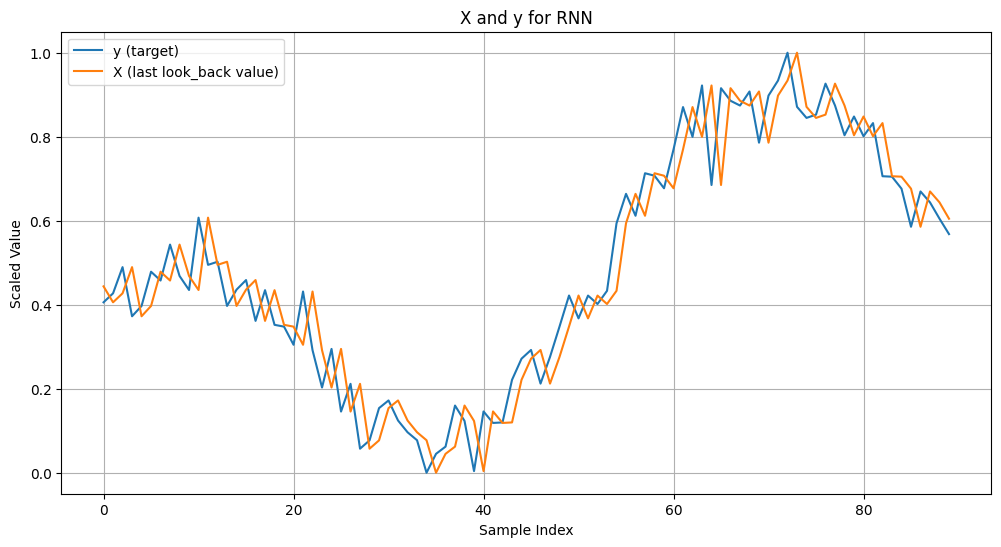

In [ ]:
# --- Plot X and y ---
plt.figure(figsize=(12, 6))
plt.plot(y, label='y (target)')
plt.plot(X[:, -1, :].flatten(), label='X (last look_back value)') # Plotting the last value of each sequence in X
plt.title('X and y for RNN')
plt.xlabel('Sample Index')
plt.ylabel('Scaled Value')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.4275
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3470
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2738
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2074
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1730
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1203
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0807
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0483
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0193
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0133
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0231
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0240
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0128
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0091
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0108
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/

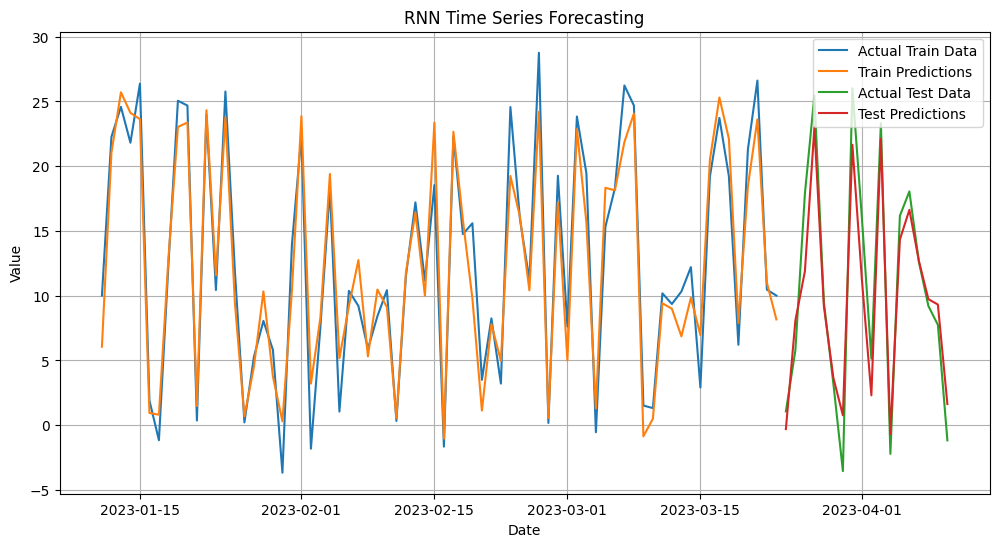

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Build and Train Simple RNN Model ---
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# --- 5. Make Predictions and Plot Results ---
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to get original scale
train_predict = scaler.inverse_transform(train_predict)
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions against actual values
plt.figure(figsize=(12, 6))
plt.plot(time_series.index[look_back:len(train_predict) + look_back], y_train_original, label='Actual Train Data')
plt.plot(time_series.index[look_back:len(train_predict) + look_back], train_predict, label='Train Predictions')
plt.plot(time_series.index[len(train_predict) + look_back:], y_test_original, label='Actual Test Data')
plt.plot(time_series.index[len(train_predict) + look_back:], test_predict, label='Test Predictions')
plt.title('RNN Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

**Computational examples**
* [Hands-On-Deep-Learning-Algorithms-with-Python, by Sudharsan Ravichandiran](https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/tree/master)
  * [Generating Song Lyrics Using RNN -](https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/blob/master/Chapter04/4.06%20Generating%20Song%20Lyrics%20Using%20RNN.ipynb)

  * [Predicting Bitcoins price using LSTM RNN](https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/blob/master/Chapter05/5.06%20Predicting%20Bitcoins%20price%20using%20LSTM%20RNN.ipynb)
* [Temperature forecasting, Deep learning with Python, by Chollet and Watson](https://deeplearningwithpython.io/chapters/chapter13_timeseries-forecasting/#a-temperature-forecasting-example)
* SHAP
  * [SHAP for RNN- sentiment analysis](https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Keras%20LSTM%20for%20IMDB%20Sentiment%20Classification.html#Keras-LSTM-for-IMDB-Sentiment-Classification)
* [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow (3rd edition), by Aurélien Geron](https://github.com/ageron/handson-ml3/blob/main/15_processing_sequences_using_rnns_and_cnns.ipynb)
  * Useful review of statistiscal ARIMA, FFNN, and RNN

